In [20]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Scientific computing and numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced data visualization

# Machine learning libraries
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.linear_model import LogisticRegression  # A common classification algorithm
from sklearn.metrics import accuracy_score,recall_score, classification_report  # Model evaluation metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix  # Confusion matrix for classification results
# Deep learning libraries (uncomment as needed)
# import tensorflow as tf
# import torch

In [45]:
train_df = pd.read_csv('Project_data/Project_Data_EE4C12_CE_ARR/ECG_data/train_data.csv')
test_df = pd.read_csv('Project_data/Project_Data_EE4C12_CE_ARR/ECG_data/test_data.csv')
val_df = pd.read_csv('Project_data/Project_Data_EE4C12_CE_ARR/ECG_data/val_data.csv')
# Display the first 5 rows of the DataFrame to confirm it loaded correctly
column_list = []
for i in range(train_df.shape[1]):
    column_list.append(str(i))
train_df.columns = column_list
test_df.columns = column_list
val_df.columns = column_list
# print(test_df.shape)
# print(train_df.shape)
# print(val_df.shape)
# print(val_df.columns)

Each row is a single beat

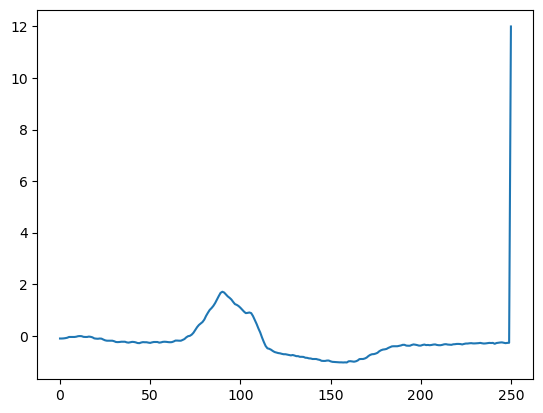

In [3]:
x = np.arange(0,251,1)
y = train_df.iloc[0]

plt.plot(x,y)
plt.show()

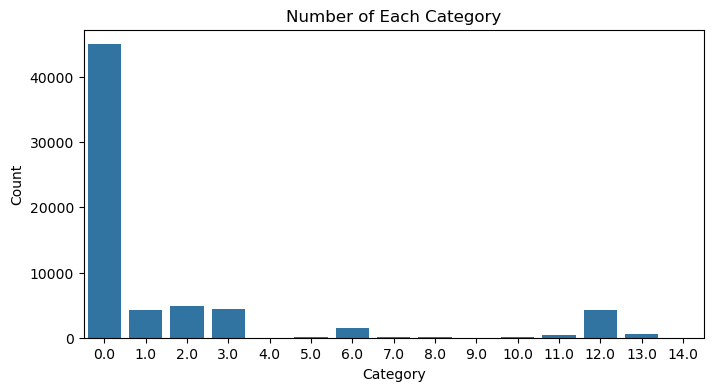

In [4]:
categories = train_df['0.000000.1'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=categories.index, y=categories.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Each Category')
plt.show()

In [ ]:
# we can see that the dataset is imbalanced, with some categories having significantly more samples than others.
#lets create simple Deeplearning model using skicitlearn to classify the ECG signals into their respective categories.

mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', max_iter=30, random_state=42)
x_train=  train_df.drop('250',axis = 1)
y_train = train_df['250']

mlp.fit(x_train, y_train)

# Align x_val columns to match x_train columns



c:\Users\azati\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [57]:
x_val = val_df.drop('250',axis = 1)
y_val = val_df['250']
x_test = test_df.drop('250',axis = 1)
y_test = test_df['250']
y_pred_val = mlp.predict(x_val)
y_pred_test = mlp.predict(x_test)

0.9501598903608954


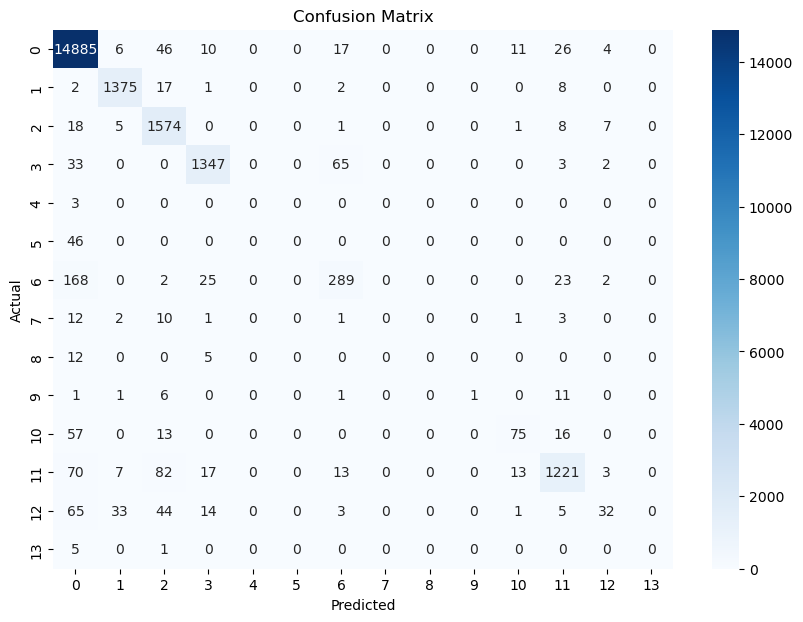

0.9498401096391046


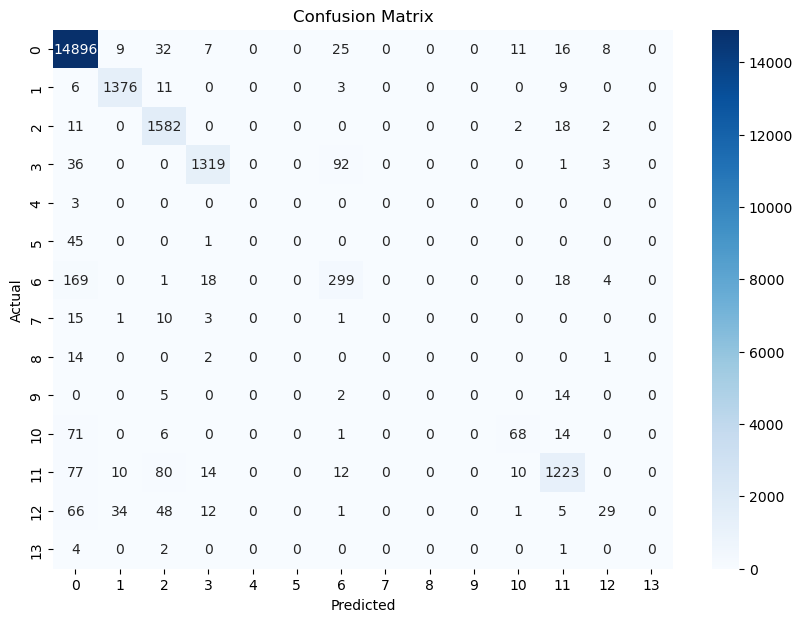

In [59]:
#confusion matrix validation
print(accuracy_score(y_val, y_pred_val))
conf = confusion_matrix(y_val, y_pred_val)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#confusion matrix test
print(accuracy_score(y_test, y_pred_test))
conf = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()